In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import math as mt
import matplotlib.pyplot as plt

2.6.0


In [2]:
StartingValues=np.load('DiscretizedCurve20TrainingsetUnivariate.npy')
print(StartingValues.shape)

(10000000, 20)


Now calculate the outputs...

In [3]:
Y=np.load('outputsUniVariate.npy')
print(Y.shape)

(10000000,)


In [4]:
import os
os.getcwd()

'/home/jovyan/work/notebooks'

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Lambda
from tensorflow.keras.losses import MeanSquaredError
#from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import initializers
from tensorflow.keras.layers import Input, Add
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K


inputs =  tf.keras.Input(shape=(20,))

models = []
for nodeHiddenLayer in range(5,155,5):
    layer = Dense(nodeHiddenLayer, activation='relu',trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal')

    outlayer=Dense(1, activation=None,trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      use_bias=False)
    
    tmp=layer(inputs)
    finalOutput=outlayer(tmp)
                              
    model = Model(inputs=inputs, outputs=finalOutput)

    model.compile(optimizer='adam',loss='mean_squared_error')
    models=models+[model]

models[0].summary()
models[29].summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 105       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________
Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_58 (Dense)             (None, 150)               3150      
_____________________________________________

In [6]:
import time
for k in range(0,len(models),1):
    tic = time.perf_counter()
    models[k].fit(StartingValues, Y, epochs=50, batch_size=10000)
    toc = time.perf_counter()
    print(k)
    print(f"Calc time: {(toc - tic)/60.0:0.4f} minutes")

2022-02-15 18:10:49.816887: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1000/1000 [==============================] - 6s 5ms/step - loss: 10.8376
Epoch 2/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1655
Epoch 3/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1416
Epoch 4/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1180
Epoch 5/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1015
Epoch 6/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0934
Epoch 7/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0889
Epoch 8/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0842
Epoch 9/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0787
Epoch 10/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0732
Epoch 11/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0690
Epoch 12/50
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0668


1000/1000 [==============================] - 6s 6ms/step - loss: 0.0662
Epoch 46/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0662
Epoch 47/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0663
Epoch 48/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0662
Epoch 49/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0662
Epoch 50/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0663
3
Calc time: 5.4100 minutes
Epoch 1/50
1000/1000 [==============================] - 8s 7ms/step - loss: 2.2925
Epoch 2/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0669
Epoch 3/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0663
Epoch 4/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0662
Epoch 5/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0662
Epoch 6/50
1000/1000 [==============================] - 7s 7ms/st

1000/1000 [==============================] - 8s 8ms/step - loss: 0.0666
Epoch 40/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0666
Epoch 41/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0665
Epoch 42/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0666
Epoch 43/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0666
Epoch 44/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0666
Epoch 45/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0665
Epoch 46/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0667
Epoch 47/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0666
Epoch 48/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0666
Epoch 49/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0665
Epoch 50/50
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0666
7
Ca

Epoch 31/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 32/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0666
Epoch 33/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 34/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 35/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 36/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0666
Epoch 37/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 38/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 39/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0666
Epoch 40/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 41/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0665
Epoch 42/50
1000/1000 [==============================]

1000/1000 [==============================] - 11s 11ms/step - loss: 0.0651
Epoch 20/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0651
Epoch 21/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0652
Epoch 22/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0650
Epoch 23/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0651
Epoch 24/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0651
Epoch 25/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0651
Epoch 26/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0650
Epoch 27/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.0651
Epoch 28/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0651
Epoch 29/50
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0651
Epoch 30/50
1000/1000 [==============================] - 11s 11ms/

1000/1000 [==============================] - 12s 12ms/step - loss: 0.0662
Epoch 8/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0662
Epoch 9/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0663
Epoch 10/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0664
Epoch 11/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0668
Epoch 12/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0672
Epoch 13/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0672
Epoch 14/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0672
Epoch 15/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0671
Epoch 16/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0672
Epoch 17/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0672
Epoch 18/50
1000/1000 [==============================] - 13s 13ms/st

1000/1000 [==============================] - 13s 13ms/step - loss: 0.0655
Epoch 47/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0653
Epoch 48/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0653
Epoch 49/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0654
Epoch 50/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0655
22
Calc time: 10.9863 minutes
Epoch 1/50
1000/1000 [==============================] - 15s 13ms/step - loss: 133.1186
Epoch 2/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.5047
Epoch 3/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.2689
Epoch 4/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.1728
Epoch 5/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.1417
Epoch 6/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1174
Epoch 7/50
1000/1000 [==================

1000/1000 [==============================] - 15s 15ms/step - loss: 0.0677
Epoch 35/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0677
Epoch 36/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0678
Epoch 37/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0677
Epoch 38/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0677
Epoch 39/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0677
Epoch 40/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0678
Epoch 41/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0677
Epoch 42/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0678
Epoch 43/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0678
Epoch 44/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0678
Epoch 45/50
1000/1000 [==============================] - 15s 15ms/

In [7]:
MCpricesTestset=np.load('outputsUniVariateTestset100000Simulations.npy')
xvaluesTestset=np.load('DiscretizedCurve20TestsetUnivariate.npy')
print(xvaluesTestset[0])
print(MCpricesTestset)

[1.53911892 1.54137217 1.54360773 1.54582572 1.54802627 1.55020949
 1.55237551 1.55452446 1.55665645 1.55877161 1.56087007 1.56295194
 1.56501735 1.56706642 1.56909927 1.57111603 1.57311682 1.57510175
 1.57707096 1.57902457]
[0.58293156 0.01456165 0.08100988 ... 0.09464409 0.03461939 0.55430981]


[0.00204044 0.00192309 0.00212619 0.00196447 0.00193346 0.00224618
 0.00010571 0.0020302  0.00011422 0.00203848 0.00195933 0.00285991
 0.00015761 0.00312942 0.0028876  0.00056145 0.00076217 0.00045206
 0.00040638 0.00195907 0.00343525 0.00198653 0.00130087 0.00205845
 0.00025478 0.00232918 0.00233282 0.00146546 0.00043213 0.00070414]


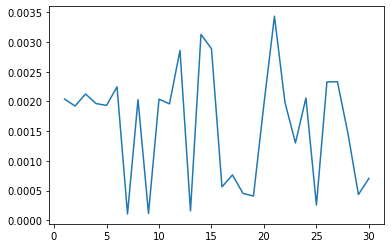

In [8]:
mctf=tf.reshape(tf.constant(MCpricesTestset),[MCpricesTestset.shape[0],1])
mctf=tf.dtypes.cast(mctf, tf.float32)
mse = tf.keras.losses.MeanSquaredError()
mses=np.zeros(30)
for k in range(0,30,1):
    predictions=models[k](xvaluesTestset)
    mses[k]=mse(predictions, mctf).numpy()
print(mses)
xvalues=range(1,31,1)
plt.plot(xvalues,mses)
plt.show()

0.00010570908489171416


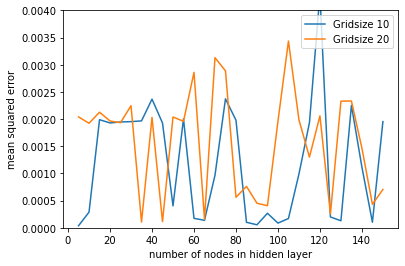

In [9]:
print(np.min(mses))
mses10=np.load('msePointBasedUnivariate10discretized.npy')

#plt.plot(xvalues,mses,label='Gridsize 20',xvalues,mses10,label='Gridsize 10')
#plt.show()
xvalues=range(5,155,5)
fig=plt.figure()
ax=plt.axes()
plt.ylim([0., 0.004])
ax.set(xlabel='number of nodes in hidden layer', ylabel='mean squared error',
       title='')
ax.plot(xvalues,mses10,label='Gridsize 10')
ax.plot(xvalues,mses,label='Gridsize 20')
plt.legend(loc='upper right')
plt.show()

In [10]:
predictionTest=model(xvaluesTestset)
mctf=tf.reshape(tf.constant(MCpricesTestset),[MCpricesTestset.shape[0],1])
mctf=tf.dtypes.cast(mctf, tf.float32)
mse = tf.keras.losses.MeanSquaredError()
mse(predictionTest, mctf).numpy()

0.000704143

In [11]:
print(np.average(mses10[3:]))
print(np.average(mses[3:]))

0.0012510462239097924
0.001550641320203862
